In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the zirkon data

In [ ]:
dataPath = './data/'
df = pd.read_csv(dataPath + '4.5Ga_zircon_d18O.csv')
#df = pd.read_csv(dataPath + '4.5Ga_zircon_Hf.csv')
df_filt = pd.read_csv(dataPath + 'filtered_data2.csv')

In [27]:
df_filt["ZIR_Interpolated_mean_d18O"]

0       0.596941
1       0.593541
2       0.593541
3       0.610494
4       0.621146
          ...   
5036    0.437092
5037    0.437092
5038    0.437092
5039    0.437092
5040    0.437092
Name: ZIR_Interpolated_mean_d18O, Length: 5041, dtype: float64

In [ ]:
# Define the window size and overlap
window_size = 5  # 5 Ma
overlap = 0.99  # 99% overlap
step_size = window_size * (1 - overlap)

# Initialize an empty list to store the results
relative_counts = []
mean_values = []
# Compute the relative counts in sliding windows
start_age = 0
end_age = 257.05
current_start = start_age

while current_start + window_size <= end_age:
    current_end = current_start + window_size
    # Count samples within the current window
    count = ((df['Age'] >= current_start) & (df['Age'] < current_end)).sum()
    average = df.loc[(df['Age'] >= current_start) & (df['Age'] < current_end), 'd18O'].mean()
    relative_counts.append({'Start': current_start, 'End': current_end, 'Count': count})
    mean_values.append({'Mean': average})
    # Move the window
    current_start += step_size

# Convert the results to a DataFrame
relative_counts_df = pd.DataFrame(relative_counts)
mean_values_df = pd.DataFrame(mean_values).fillna(method='ffill').fillna(method='bfill')
relative_counts_df = pd.concat([relative_counts_df, mean_values_df], axis=1)
print(relative_counts_df)

       Start     End  Count      Mean
0       0.00    5.00      7  7.300000
1       0.05    5.05      7  7.300000
2       0.10    5.10      7  7.300000
3       0.15    5.15      7  7.300000
4       0.20    5.20      7  7.300000
...      ...     ...    ...       ...
5036  251.80  256.80     59  3.532203
5037  251.85  256.85     59  3.532203
5038  251.90  256.90     59  3.532203
5039  251.95  256.95     59  3.532203
5040  252.00  257.00     64  3.278125

[5041 rows x 4 columns]


/tmp/ipykernel_5423/1791079371.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mean_values_df = pd.DataFrame(mean_values).fillna(method='ffill').fillna(method='bfill')


# Plot the PDF

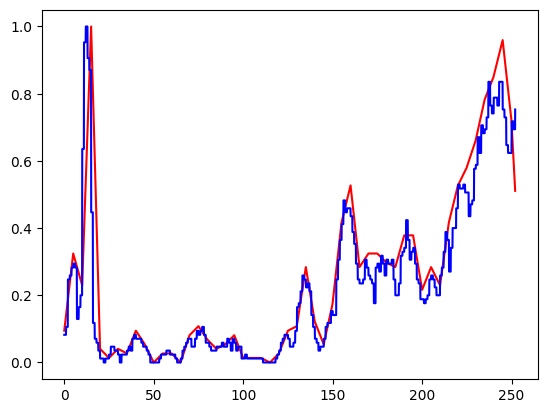

In [ ]:
plt.plot(df_filt["Age"], df_filt["ZIR_Count_PDF_d18O"],color='red')
plt.plot(relative_counts_df['Start'], relative_counts_df['Count']/relative_counts_df['Count'].max(), label='Count', color='blue')

# Plot the mean values

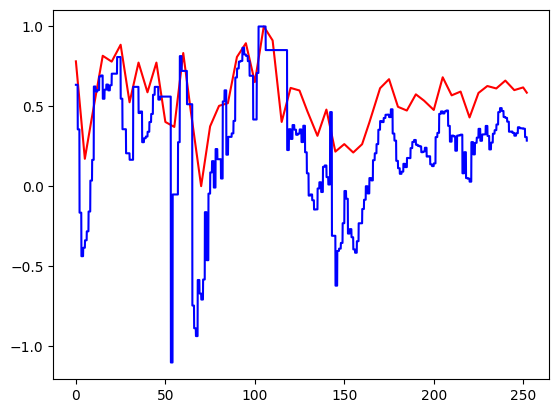

In [ ]:
plt.plot(df_filt["Age"], df_filt["ZIR_Interpolated_mean_d18O"],color='red')
plt.plot(relative_counts_df['Start'], relative_counts_df["Mean"]/relative_counts_df["Mean"].max(), label='Mean', color='blue')

In [ ]:
relative_counts_df = relative_counts_df.iloc[::-1].reset_index(drop=True)
df_filt["ZIR_Count_PDF_d18O"] = relative_counts_df["Count"]/relative_counts_df["Count"].max()
df_filt["ZIR_Interpolated_mean_d18O"] = relative_counts_df["Mean"]/relative_counts_df["Mean"].max()

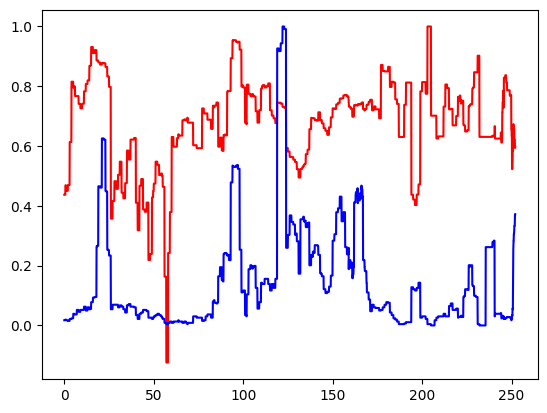

In [25]:
plt.plot(df_filt["Age"], df_filt["ZIR_Interpolated_mean_d18O"],color='red')
plt.plot(df_filt["Age"], df_filt["ZIR_Count_PDF_d18O"],color='blue')

In [ ]:
dataPath = './data/'
#df = pd.read_csv(dataPath + '4.5Ga_zircon_d18O.csv')
df = pd.read_csv(dataPath + '4.5Ga_zircon_Hf.csv')

In [ ]:
# Define the window size and overlap
window_size = 5  # 5 Ma
overlap = 0.99  # 99% overlap
step_size = window_size * (1 - overlap)

# Initialize an empty list to store the results
relative_counts = []
mean_values = []
# Compute the relative counts in sliding windows
start_age = 0
end_age = 257.05
current_start = start_age

while current_start + window_size <= end_age:
    current_end = current_start + window_size
    # Count samples within the current window
    count = ((df['Age'] >= current_start) & (df['Age'] < current_end)).sum()
    average = df.loc[(df['Age'] >= current_start) & (df['Age'] < current_end), 'Hf'].mean()
    relative_counts.append({'Start': current_start, 'End': current_end, 'Count': count})
    mean_values.append({'Mean': average})
    # Move the window
    current_start += step_size

# Convert the results to a DataFrame
relative_counts_df = pd.DataFrame(relative_counts)
mean_values_df = pd.DataFrame(mean_values).fillna(method='ffill').fillna(method='bfill')
relative_counts_df = pd.concat([relative_counts_df, mean_values_df], axis=1)
print(relative_counts_df)

In [ ]:
plt.plot(df_filt["Age"], df_filt["ZIR_Count_PDF_Hf"],color='red')
plt.plot(relative_counts_df['Start'], relative_counts_df['Count']/relative_counts_df['Count'].max(), label='Count', color='blue')

In [ ]:
plt.plot(df_filt["Age"], df_filt["ZIR_Interpolated_mean_Hf"],color='red')
plt.plot(relative_counts_df['Start'], relative_counts_df["Mean"]/relative_counts_df["Mean"].max(), label='Mean', color='blue')

In [ ]:
relative_counts_df = relative_counts_df.iloc[::-1].reset_index(drop=True)
df_filt["ZIR_Count_PDF_Hf"] = relative_counts_df["Count"]/relative_counts_df["Count"].max()
df_filt["ZIR_Interpolated_mean_Hf"] = relative_counts_df["Mean"]/relative_counts_df["Mean"].max()

In [ ]:
plt.plot(df_filt["Age"], df_filt["ZIR_Interpolated_mean_Hf"],color='red')
plt.plot(df_filt["Age"], df_filt["ZIR_Count_PDF_Hf"],color='blue')